In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv('iris.csv')
X = data.drop('Species', axis=1)
print(data.head())
print(data.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [4]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

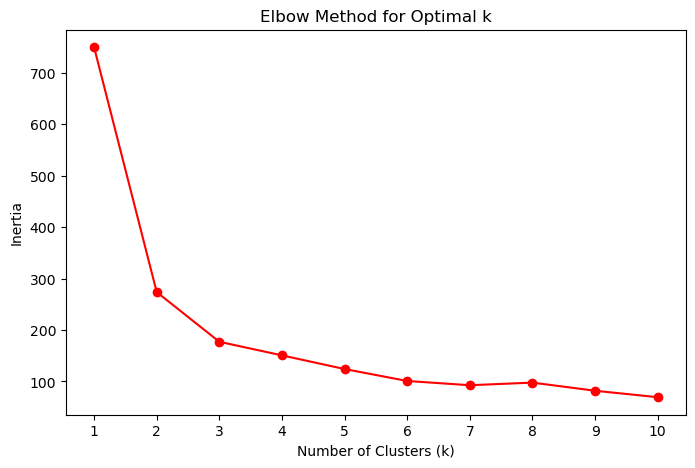

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o',color='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means (k=3): {kmeans_silhouette:.4f}')

Silhouette Score for K-Means (k=3): 0.4529


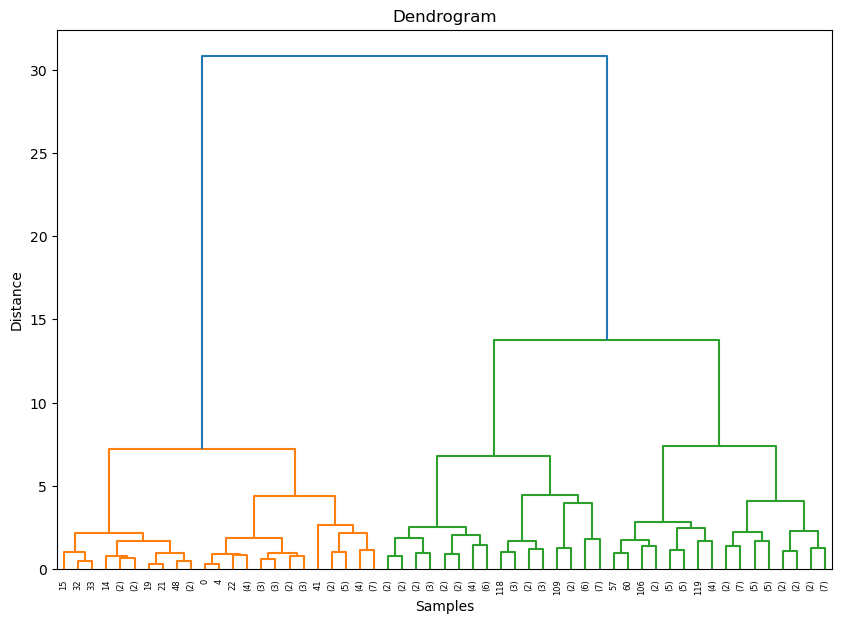

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [13]:
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)
data['Agg_Cluster'] = agg_labels

In [14]:
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {agg_silhouette:.4f}')

Silhouette Score for Agglomerative Clustering: 0.4518


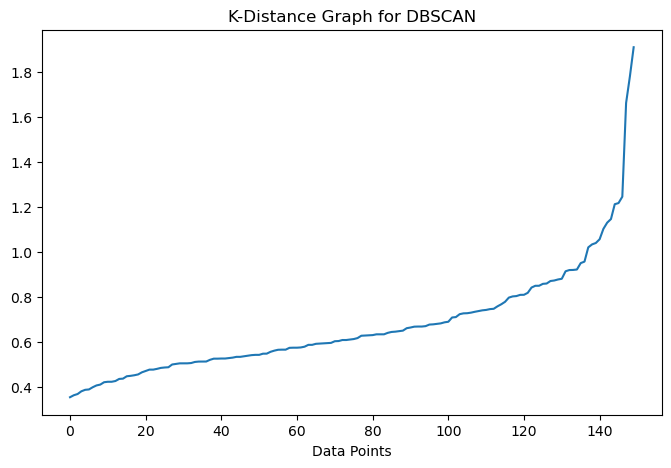

In [30]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points')
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
eps = 0.5
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

In [29]:
# Calculate the silhouette score 
dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.4f}')

Silhouette Score for DBSCAN: 0.3825


In [22]:
print("K-Means Cluster Statistics")
print(data.groupby('KMeans_Cluster').mean(numeric_only=True))  # Explicit numeric_only=True to ensure numeric processing

print("\nAgglomerative Cluster Statistics")
print(data.groupby('Agg_Cluster').mean(numeric_only=True))

print("\nDBSCAN Cluster Statistics")
print(data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean(numeric_only=True))

K-Means Cluster Statistics
                        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
KMeans_Cluster                                                           
0               125.000000       6.697872      3.023404       5.591489   
1                78.773585       5.875472      2.737736       4.298113   
2                25.500000       5.006000      3.418000       1.464000   

                PetalWidthCm  Agg_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                             
0                   2.029787     1.914894        0.638298  
1                   1.362264     0.113208        1.245283  
2                   0.244000     1.000000        0.080000  

Agglomerative Cluster Statistics
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Agg_Cluster                                                           
0             76.961538       5.917308      2.753846       4.278846   
1             25.500000       5.006000      3.418000   

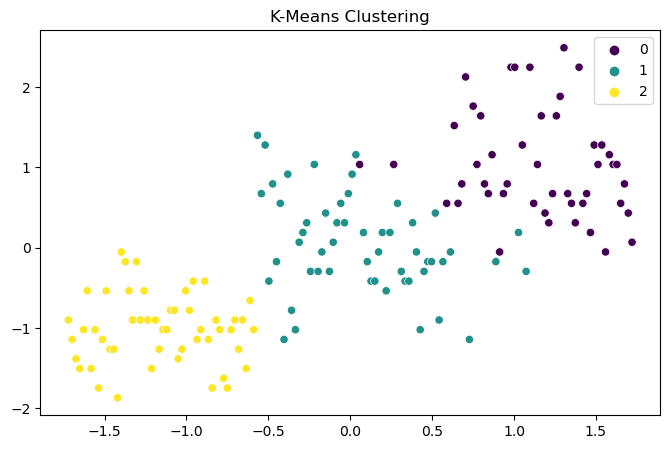

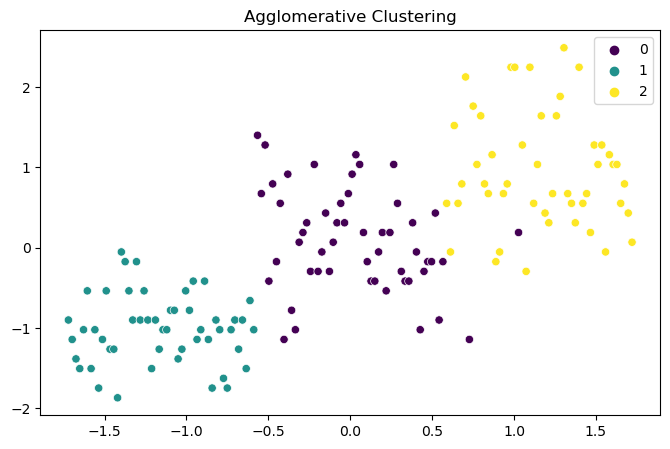

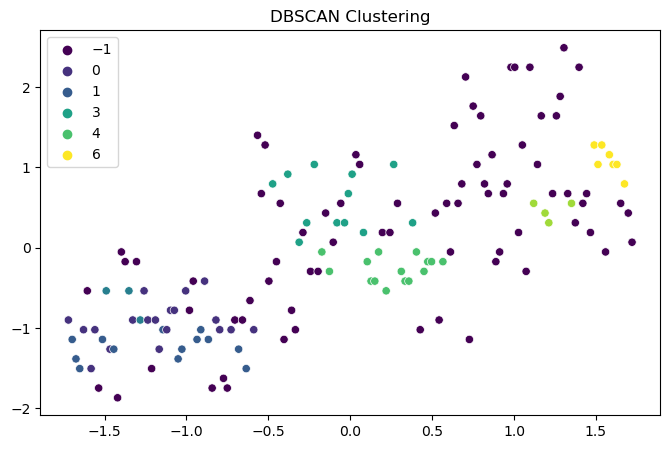

In [23]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()